In [1]:
import re
from bs4 import BeautifulSoup

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    text = BeautifulSoup(str(text) , "lxml").get_text()
    return TAG_RE.sub('', text.replace("\t" ,"").replace('\xa0', '')
                      .replace('انتهای پیام/', '')
                      .replace('\n', '').replace('\r', '')
                      .replace('&nbsp;','').replace('\u200c','')
                      .replace('&#8221;','')
                      .strip())

In [2]:
import pandas as pd

In [3]:
dfn = pd.read_excel("news1.xlsx", sheet_name=None)

In [4]:
dfn["content"] = dfn["report"]
dfn=dfn["content"]

In [5]:
dfn["title"] = dfn["title"]
dfn["content"] = dfn["content"]

In [6]:
writer_orig = pd.ExcelWriter('news1.xlsx', engine='xlsxwriter')
dfn.to_excel(writer_orig, index=False, sheet_name='report')
writer_orig.save()

In [7]:
dfn.head()

,title,content
0,خرید جدید گوگل زیر ذرهبین کمیسیون فدرال ارتباط...,به گزارش فارس به نقل از وال استریت ، گوگل ه...
1,بازار سکه و دلار از نگاه تحلیلگران/پایان فصل ع...,به گزارش خبرنگار اقتصادی خبرگزاری فارس، از ابت...
2,افشای ابعاد تازه جاسوسی فیس بوک از کاربرانش,به گزارش فارس به نقل از زد دی نت، عاملی که به ...
3,بازگشایی،توقف و حراج نمادهای بورسی,به گزارش خبرگزاری فارس به نقل از بورس اوراق ب...
4,غرب و پیروزی انتخاباتی روحانی,به گزارش سرویس فضای مجازی خبرگزاری فارس، سعدا...


In [8]:
dfn['content'].replace('[!"#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’«»”“′‘،،\\\]',' ',inplace=True,regex=True)
dfn['content'].replace('[۰۱۲۳۴۵۶۷۸۹]','',inplace=True,regex=True)

dfn["title"].replace('[!"#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’«»”“′‘،،\\\]',' ',inplace=True,regex=True)
dfn['title'].replace('[۰۱۲۳۴۵۶۷۸۹]','',inplace=True,regex=True)

In [9]:
a = dfn['content'].str.split(' ')
a.append(dfn['title'].str.split(' '))

0       [به, گزارش, فارس, به, نقل, از, , وال, استریت, ...
1       [به, گزارش, خبرنگار, اقتصادی, خبرگزاری, فارس, ...
2       [به, گزارش, فارس, به, نقل, از, زد, دی, نت, , ع...
3       [به, گزارش, خبرگزاری, فارس, به, نقل, از, , بور...
4       [به, گزارش, سرویس, فضای, مجازی, خبرگزاری, فارس...
5       [به, گزارش, سرویس, فضای, مجازی, خبرگزاری, فارس...
6       [به, گزارش, خبرگزاری, فارس, از, دشتستان, , اصغ...
7       [توکل, حیدری, امروز, در, گفت, و, گو, با, خبرنگ...
8       [به, گزارش, خبرگزاری, فارس, از, بوشهر, , حجت, ...
9       [به, گزارش, خبرگزاری, فارس, از, بوشهر, به, نقل...
10      [حمید, مرادی, , ورزشکار, اردکانی, در, گفت, وگو...
11      [به, گزارش, خبرگزاری, فارس, از, بیرجند, , حجت,...
12      [به, گزارش, خبرگزاری, فارس, , روستای, رودخانه,...
13      [حسن, سلطانی, , نژاد, امروز, در, گفت, وگو, با,...
14      [به, گزارش, خبرگزاری, فارس, از, دشتستان, , حجت...
15      [سید, مهدی, موسوی, امروز, در, گفت, وگو, با, خب...
16      [به, گزارش, خبرگزاری, فارس, از, ابرکوه, , جواد...
17      [جواد,

In [10]:


import pandas as pd
import numpy as np
import re
from tqdm import tqdm

from nltk.corpus import stopwords

from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

%matplotlib inline



E:\Anaconda\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [11]:
# get stop words from nltk
import nltk
nltk.download('stopwords')
stopWords = stopwords.words('english')

# pre processing data
def cleanData(sentence):
    processedList = ""
    
    # convert to lowercase, ignore all special characters - keep only alpha-numericals and spaces (not removing full-stop here)
    sentence = re.sub(r'[^A-Za-z0-9\s.]',r'',str(sentence).lower())
    sentence = re.sub(r'\n',r' ',sentence)
    
    # remove stop words
    sentence = " ".join([word for word in sentence.split() if word not in stopWords])
    
    return sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emertat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# get stop words from nltk
import nltk
nltk.download('stopwords')
#https://github.com/kharazi/persian-stopwords
stopWords = stopwords.words('persian')

# pre processing data
def cleanData(sentence):
    processedList = ""
    
    # convert to lowercase, ignore all special characters - keep only alpha-numericals and spaces (not removing full-stop here)
    sentence = re.sub(r'[^ا-ی۰-۹\s.]',r'',str(sentence).lower())
    sentence = re.sub(r'\n',r' ',sentence)
    
    # remove stop words
    sentence = " ".join([word for word in sentence.split() if word not in stopWords])
    
    return sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emertat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
cleanData(dfn['content'])

'گزارش فارس نقل وال استریت گوگل ه... گزارش خبرنگار اقتصادی خبرگزاری فارس ابت... گزارش فارس نقل زد دی نت عاملی ... گزارش خبرگزاری فارس نقل بورس اوراق ب... گزارش سرویس فضای مجازی خبرگزاری فارس سعدا... گزارش سرویس فضای مجازی خبرگزاری فارس روزن... گزارش خبرگزاری فارس دشتستان اصغر مطهری ... توکل حیدری خبرنگار فارس د... گزارش خبرگزاری فارس بوشهر حجت الاسلام س... گزارش خبرگزاری فارس بوشهر نقل رواب... حمید مرادی ورزشکار اردکانی خبرن... گزارش خبرگزاری فارس بیرجند حجت الاسلام ... گزارش خبرگزاری فارس روستای رودخانه سادات ی... حسن سلطانی نژاد خبرنگار ف... گزارش خبرگزاری فارس دشتستان حجت الاسلام... سید مهدی موسوی خبرنگار فار... گزارش خبرگزاری فارس ابرکوه جواد عادل در... جواد عادل خبرنگار فارس ... گزارش خبرگزاری فارس بیرجند علی محمد گلس... مجید خراسانی حاشیه مراسم افتتاحیه سراسری ار... سنت کلر ملیسی سخنگوی کمیته برگزار جام ج... هافبک میانی استقلال تیم رقیب پ... رقابتهای گروه رقابتهای جام کنفدراسیون ... سرمربی تیم ملی فوتبال کشورمان استراحت چ... رمزگشایی صحبت نکونام متوجه شد... گزارش تابناک خبر جالب 

In [16]:
cleanData(dfn['title'])

'خرید گوگل ذرهبین کمیسیون فدرال ارتباط... بازار سکه دلار تحلیلگران پایان فصل ع... افشای ابعاد جاسوسی فیس بوک کاربرانش بازگشایی توقف حراج نمادهای بورسی غرب پیروزی انتخاباتی روحانی دلار هدیه امیران عرب شاهزاده چار... اتفاقات حوزه محیط زیست تبعات جهانی افزایش دانش حقوقی تلاش امام عج عدالت اسلامی جهان مستقر ریس ستاد برگزاری پنجمین جشنواره اختراعات خلیج... روپایی میوه شکستن رکورد گینس اتقا ر... پیشگیری فرهنگی اجتماعی اولویت کاری قرا... جاذبههای سحرمیز روستای رودخانه سادات تصاویر دستگیری دندانپزشک قلابی کوهبنان انتخابات خرداد لبیک ندای مقام معظم رهبری... تسطیح بستر جادهسرویس کانال اصلی شبکه بیاری بپخش برگزاری افتتاحیه جشنواره فرهنگ رضوی ابرکوه اداره ارشاد بازداشتگاه ابرکوه همکاری لزوم همپوشانی دستگاههای مربوطه حوزههای فرهن... تسهیلات اقتصاد مقاومتی تومان م... اعتراضات برزيل فيفا غافلگير مجتبی جباری ستانه پرسپولیسی پیروزی مکزیک ژاپن کیروش تهران ترک مذاكره استقلال هافبك دفاعي تيم ملي دايي وزير ورزش ميشود ضد فتاب لک میورد رژ سرب بدهیها مانعی برنامههای باشگاه نمیشود برتری پرگل برزیل ایتالیا روزن

In [17]:
dfn['title'] = dfn['title'].map(lambda x: cleanData(x))

In [18]:
dfn['content'] = dfn['content'].map(lambda x: cleanData(x))

In [19]:
dfn['title'].head()

0        خرید گوگل ذرهبین کمیسیون فدرال ارتباطات مریکا
1    بازار سکه دلار تحلیلگران پایان فصل عروسی هندیه...
2                  افشای ابعاد جاسوسی فیس بوک کاربرانش
3                     بازگشایی توقف حراج نمادهای بورسی
4                          غرب پیروزی انتخاباتی روحانی
Name: title, dtype: object

In [20]:
dfn['content'].head()

0    گزارش فارس نقل وال استریت گوگل هفته پرداخت دلا...
1    گزارش خبرنگار اقتصادی خبرگزاری فارس ابتدای هفت...
2    گزارش فارس نقل زد دی نت عاملی خشم کاربران دامن...
3    گزارش خبرگزاری فارس نقل بورس اوراق بهادار تهرا...
4    گزارش سرویس فضای مجازی خبرگزاری فارس سعدالله ز...
Name: content, dtype: object

In [21]:
tmp_corpus = dfn['content'].map(lambda x: x.split('.'))

In [22]:
# corpus [[w1,w2,w3..],[..]]
corpus = []
for i in tqdm(range(len(tmp_corpus))):
    for line in tmp_corpus[i]:
        words = [x for x in line.split()]
        corpus.append(words)

100%|██████████| 1006/1006 [00:00<00:00, 14180.04it/s]


In [23]:
num_of_sentences = len(corpus)
num_of_words = 0
for line in corpus:
    num_of_words += len(line)

print('Num of sentences - %s'%(num_of_sentences))
print('Num of words - %s'%(num_of_words))

Num of sentences - 1006
Num of words - 247005


In [24]:
phrases = Phrases(sentences=corpus,min_count=25,threshold=50)
bigram = Phraser(phrases)

2018-11-03 19:43:30,290 : INFO : collecting all words and their counts
2018-11-03 19:43:30,294 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2018-11-03 19:43:30,942 : INFO : collected 201972 word types from a corpus of 247005 words (unigram + bigrams) and 1006 sentences
2018-11-03 19:43:30,945 : INFO : using 201972 counts as vocab in Phrases<0 vocab, min_count=25, threshold=50, max_vocab_size=40000000>
2018-11-03 19:43:30,947 : INFO : source_vocab length 201972
2018-11-03 19:43:33,663 : INFO : Phraser built with 104 phrasegrams


In [25]:
for index,sentence in enumerate(corpus):
    corpus[index] = bigram[sentence]


In [26]:
# shuffle corpus
def shuffle_corpus(sentences):
    shuffled = list(sentences)
    random.shuffle(shuffled)
    return shuffled

In [27]:
# sg - skip gram |  window = size of the window | size = vector dimension
size = 100
window_size = 2 # sentences weren't too long, so
epochs = 100
min_count = 2
workers = 4

In [28]:
#https://github.com/kavgan/nlp-text-mining-working-examples/blob/master/word2vec/Word2Vec.ipynb
# train word2vec model using gensim
model = Word2Vec(corpus, sg=1,window=window_size,size=size,
                 min_count=min_count,workers=workers,iter=epochs,sample=0.01)

2018-11-03 19:43:40,520 : INFO : collecting all words and their counts
2018-11-03 19:43:40,522 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-11-03 19:43:40,595 : INFO : collected 25895 word types from a corpus of 240898 raw words and 1006 sentences
2018-11-03 19:43:40,597 : INFO : Loading a fresh vocabulary
2018-11-03 19:43:40,690 : INFO : effective_min_count=2 retains 13515 unique words (52% of original 25895, drops 12380)
2018-11-03 19:43:40,693 : INFO : effective_min_count=2 leaves 228518 word corpus (94% of original 240898, drops 12380)
2018-11-03 19:43:40,745 : INFO : deleting the raw counts dictionary of 25895 items
2018-11-03 19:43:40,749 : INFO : sample=0.01 downsamples 0 most-common words
2018-11-03 19:43:40,751 : INFO : downsampling leaves estimated 228518 word corpus (100.0% of prior 228518)
2018-11-03 19:43:40,838 : INFO : estimated required memory for 13515 words and 100 dimensions: 17569500 bytes
2018-11-03 19:43:40,840 : INFO : resetting

2018-11-03 19:43:47,030 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:43:47,060 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:43:47,071 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:43:47,077 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:43:47,079 : INFO : EPOCH - 15 : training on 240898 raw words (228518 effective words) took 0.4s, 532608 effective words/s
2018-11-03 19:43:47,481 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:43:47,488 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:43:47,496 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:43:47,511 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:43:47,513 : INFO : EPOCH - 16 : training on 240898 raw words (228518 effective words) took 0.4s, 533088 effective words/s


2018-11-03 19:43:52,974 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:43:52,993 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:43:52,996 : INFO : EPOCH - 31 : training on 240898 raw words (228518 effective words) took 0.4s, 644705 effective words/s
2018-11-03 19:43:53,308 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:43:53,316 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:43:53,334 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:43:53,344 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:43:53,349 : INFO : EPOCH - 32 : training on 240898 raw words (228518 effective words) took 0.3s, 660737 effective words/s
2018-11-03 19:43:53,660 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:43:53,663 : INFO : worker thread finished; awaiting finish of 2 more threads


2018-11-03 19:43:58,579 : INFO : EPOCH - 47 : training on 240898 raw words (228518 effective words) took 0.3s, 662628 effective words/s
2018-11-03 19:43:58,877 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:43:58,884 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:43:58,894 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:43:58,916 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:43:58,920 : INFO : EPOCH - 48 : training on 240898 raw words (228518 effective words) took 0.3s, 683505 effective words/s
2018-11-03 19:43:59,228 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:43:59,231 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:43:59,243 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:43:59,262 : INFO : worker thread finished; awaiting finish of 0 more threads


2018-11-03 19:44:05,234 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:44:05,238 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:44:05,250 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:44:05,253 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:44:05,255 : INFO : EPOCH - 64 : training on 240898 raw words (228518 effective words) took 0.4s, 646888 effective words/s
2018-11-03 19:44:05,622 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:44:05,634 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:44:05,643 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:44:05,664 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:44:05,667 : INFO : EPOCH - 65 : training on 240898 raw words (228518 effective words) took 0.4s, 572244 effective words/s


2018-11-03 19:44:11,457 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:44:11,479 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:44:11,483 : INFO : EPOCH - 80 : training on 240898 raw words (228518 effective words) took 0.4s, 617114 effective words/s
2018-11-03 19:44:11,792 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:44:11,796 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:44:11,799 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:44:11,814 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:44:11,817 : INFO : EPOCH - 81 : training on 240898 raw words (228518 effective words) took 0.3s, 698295 effective words/s
2018-11-03 19:44:12,133 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:44:12,147 : INFO : worker thread finished; awaiting finish of 2 more threads


2018-11-03 19:44:17,489 : INFO : EPOCH - 96 : training on 240898 raw words (228518 effective words) took 0.4s, 570124 effective words/s
2018-11-03 19:44:17,843 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:44:17,853 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:44:17,873 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:44:17,881 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-03 19:44:17,885 : INFO : EPOCH - 97 : training on 240898 raw words (228518 effective words) took 0.4s, 585995 effective words/s
2018-11-03 19:44:18,261 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-03 19:44:18,270 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-03 19:44:18,278 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-03 19:44:18,286 : INFO : worker thread finished; awaiting finish of 0 more threads


In [29]:
# save model
model.save('w2v_model1')

2018-11-03 19:44:19,262 : INFO : saving Word2Vec object under w2v_model1, separately None
2018-11-03 19:44:19,267 : INFO : not storing attribute vectors_norm
2018-11-03 19:44:19,271 : INFO : not storing attribute cum_table
2018-11-03 19:44:19,526 : INFO : saved w2v_model1


In [30]:
# load word2vec model
model = Word2Vec.load('w2v_model1')

2018-11-03 19:44:19,537 : INFO : loading Word2Vec object from w2v_model1
2018-11-03 19:44:19,716 : INFO : loading vocabulary recursively from w2v_model1.vocabulary.* with mmap=None
2018-11-03 19:44:19,719 : INFO : loading wv recursively from w2v_model1.wv.* with mmap=None
2018-11-03 19:44:19,721 : INFO : setting ignored attribute vectors_norm to None
2018-11-03 19:44:19,723 : INFO : loading trainables recursively from w2v_model1.trainables.* with mmap=None
2018-11-03 19:44:19,726 : INFO : setting ignored attribute cum_table to None
2018-11-03 19:44:19,728 : INFO : loaded w2v_model1


In [31]:
model.most_similar(positive=['روحانی', 'رهبری'], negative=['جنگ'], topn=1)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2018-11-03 19:44:19,788 : INFO : precomputing L2-norms of word weight vectors
E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('مقام_معظم', 0.5604795217514038)]

In [32]:
model.doesnt_match('سلام خوبی سنجاق هوا چطوره '.split())

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
2018-11-03 19:44:21,644 : WARNING : vectors for words {'چطوره'} are not present in the model, ignoring these words
E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'سنجاق'

In [33]:
model.doesnt_match('گزارش این سلام دقیق است'.split())

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
2018-11-03 19:44:47,148 : WARNING : vectors for words {'این', 'است'} are not present in the model, ignoring these words
E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'دقیق'

In [34]:
model.similarity('جمهور','روحانی')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.20278591

In [35]:
model.most_similar('روحانی')


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('حسن_روحانی', 0.6115655899047852),
 ('الموجودین', 0.5819423794746399),
 ('غرضی', 0.5552648305892944),
 ('محمدخاتمی', 0.5425220727920532),
 ('عارف', 0.5406407117843628),
 ('رولان', 0.5248472690582275),
 ('ریاستجمهوری', 0.5111573338508606),
 ('سرافرازی', 0.5108141303062439),
 ('مشاورین', 0.5050337910652161),
 ('برنتافته', 0.5025954842567444)]

In [36]:


# Which one is the odd one out in this list?
model.wv.doesnt_match(["احمدی نژاد","خاتمی","روحانی"])



2018-11-03 19:44:49,715 : WARNING : vectors for words {'احمدی نژاد'} are not present in the model, ignoring these words
E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'خاتمی'

In [37]:
model.most_similar('رهبر')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('معظم', 0.5834006071090698),
 ('رهنمودهای', 0.5318645238876343),
 ('چکناواریان', 0.5236894488334656),
 ('بلگراد', 0.5023677349090576),
 ('مدبرانه', 0.49711787700653076),
 ('صفرمراد', 0.49322253465652466),
 ('اولمرت', 0.4926684498786926),
 ('فرزانه', 0.48945799469947815),
 ('پاسداران', 0.4855658710002899),
 ('فقید', 0.48433801531791687)]

In [38]:
import re
import string
mystring = str(dfn['content'])
mystring
frequency = {}
document_text = dfn['content']
#text_string = document_text.read().lower()
match_pattern = re.findall(r'\b[ا-ی]{3,15}\b', mystring)
 
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print (words, frequency[words])
    

استریت 1
ادوارد 1
گزارش 43
تیم 5
گوگل 1
دلاویز 1
بازیکنان 1
کوهبنان 1
فدراسیون 1
تلویزیون 1
رسیدن 1
فضای 4
محمد 2
اکب 1
دنب 1
ستاره 1
اردکان 1
نژاد 1
بلغاری 1
دباغ 1
جشنواره 1
گیدو 1
کاراییلان 1
الشرق 1
حجت 3
دامن 1
استاندارد 1
نچلوتی 1
افتتاحیه 1
امام 1
عاملی 1
رادیو 1
گزارشی 1
علی 2
نکونام 1
حضرت 1
رال 1
بهرام 1
مرادی 1
مونیخی 1
مطهری 1
موافقت 1
بپیوندد 1
مراسم 1
اجرای 1
شکست 1
ژاپن 1
سوم 1
ریس 2
پرسپولیس 2
روزیک 1
ابرکوه 2
پیروزی 1
جها 2
محمدباق 1
تلویزیونی 1
تاری 1
خرید 1
هفت 1
سلطانی 1
عادل 2
سلامت 1
هاندلزبلات 1
مدیر 1
بیرجند 2
مذاکره 1
هافبک 1
کشورمان 1
هیت 1
خبرنگار 9
رقابتهای 2
تابناک 1
ایر 1
ملی 2
نکه 1
خبرگزاری 37
جلس 1
سومین 1
فرهنگی 1
میانی 1
فوتبال 3
استقلال 2
ریاست 1
وتوافق 1
وال 1
کوهنوردی 1
کمیته 1
برنامه 1
نظام 1
رسمی 1
اوراق 1
شنبه 1
مصر 1
گلستانی 1
سان 1
هفته 3
جام 2
مجید 1
کاربران 1
بنیا 1
دلا 1
ایرنا 5
حیدری 1
فارس 29
گذشت 1
مکزیک 1
سازمان 1
روزنامه 2
دوره 1
خبر 1
بهادار 1
زنده 1
استراحت 1
میراث 1
رازهای 1
حسن 1
ملیسی 1
عمومی 2
شرایطی 1
ورزشکار 1
کلر 1
ابتدای 1
را

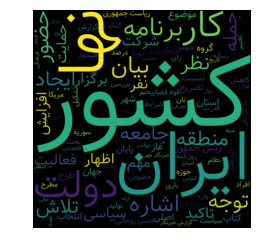

In [46]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
# Python program to generate WordCloud


# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
#https://github.com/mehotkhan/persian-word-cloud
from os import path

from persian_wordcloud.wordcloud import PersianWordCloud, add_stop_words
# Reads 'Youtube04-Eminem.csv' file 
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1")
df = pd.read_excel(u"news1.xlsx", encoding ="utf-8")
#alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

comment_words = ' '


stopwords = set(stopWords)

stopwords.add("سال")
stopwords.add("دست")
stopwords.add("ادامه")
stopwords.add("قرار")
stopwords.add("دلیل")
stopwords.add("president")
stopwords.add("advertisement")
stopwords.add("know")
stopwords.add("people")
stopwords.add("news")

# iterate through the csv file
for val in dfn['content']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
         
    for words in tokens:
        if words not in stopwords:
            comment_words = comment_words + words + ' '
wordcloud = PersianWordCloud(
    only_persian=True,
    max_words=100,
    stopwords=stopwords,
    margin=0,
    width=900,
    height=900,
    min_font_size=1,
    max_font_size=500,
    #mask=alice_mask
).generate(comment_words)

#wordcloud = WordCloud(width = 800, height = 800,
#                background_color ='white',
#                stopwords = stopwords,
#                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
#plt.figure(figsize = (8, 8), facecolor = None)
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.tight_layout(pad = 0)
#image = wordcloud.to_image()
#image.save('alice_mask.png')
#plt.show()



# show
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()

In [47]:

comment_words

' گزارش فارس نقل وال استریت گوگل هفته پرداخت دلار شرکتی خریداری شرکت عرضه برنامه ناوبری نقشه خوانی همراه تخصص کارشناسان خرید گوگل معنای تشدید رقابت شرکت شرکت تولیدکننده پلاتفرم همراه اپل مایکروسافت خرید یاد نگرانی کنترل انحصاری بازار نقشه خوانی ناوبری همراه رقبای گوگل افزایش مساله باعث کمیسیون فدرال ارتباطات مریکا اندیشه رسیدگی خرید دلاری برید کارشناسان حقوقی کمیسیون فدرال ارتباطات مریکا خرید احتمال رود گوگل مدارکی اراه ثابت شرکت خرید رقابت بازار نرم افزارهای نقشه خوان انحصاری نهایی خرید گوگل مایکروسافت فیس بوک دنبال خرید گوگل اراه پیشنهادی بالاتر رقبای زد گزارش خبرنگار اقتصادی خبرگزاری فارس ابتدای هفته قطعه سکه طرح افت توجهی همراه طوری تومان کاهش عبارتی معاملات سکه ارز دربازاراز خرید فروشتغییر کاهش ارزش اونس طلا بازارهای جهانی امیدواری کاهش تحریم تبع کاهش تنش المللی امیدواری نسبت ینده انتظارات روانی ایجاد شدهموجب تغییرات اساسی قیمت تاجایی قطعهسکه امامی تومان دلار تومان کاهش قیمت گرم طلا عیار روندی کاهش توماندر بازار تهران ارزش نظر تحلیل گران چشم انداز اونس دلار سکه محمد شاهینی تحلیل گ

In [48]:
nn=[]

for b in a:
  
    for d in b:
        if d not in stopWords:
            nn.append(d)

TypeError: 'float' object is not iterable

In [49]:

from nltk.probability import FreqDist
fdist = FreqDist(nn)
top_ten = fdist.most_common(100)


In [50]:
top_ten = fdist.most_common(100)
top_ten



[('', 2155),
 ('ایران', 46),
 ('برنامه', 33),
 ('فارس', 30),
 ('غرب', 30),
 ('بازار', 29),
 ('روحانی', 28),
 ('کشور', 28),
 ('استان', 28),
 ('قیمت', 27),
 ('کاهش', 26),
 ('گزارش', 25),
 ('اسلامی', 25),
 ('سال', 24),
 ('طلا', 24),
 ('انتخابات', 24),
 ('هفته', 23),
 ('دلار', 23),
 ('سکه', 22),
 ('اظهار', 22),
 ('ادامه', 22),
 ('برزیل', 20),
 ('منطقه', 19),
 ('جهانی', 19),
 ('قرار', 18),
 ('تیم', 18),
 ('خبرگزاری', 18),
 ('رئیس', 18),
 ('شرکت', 17),
 ('زیست', 17),
 ('کار', 17),
 ('بوشهر', 16),
 ('اصلی', 16),
 ('اجرای', 16),
 ('نظر', 16),
 ('نیمه', 15),
 ('فرهنگی', 15),
 ('ابرکوه', 15),
 ('اقتصاد', 15),
 ('نظام', 15),
 ('سیاست', 15),
 ('بیان', 15),
 ('محیط', 15),
 ('اجتماعی', 15),
 ('رودخانه', 14),
 ('شهرستان', 14),
 ('مهم', 14),
 ('فرد', 13),
 ('گل', 13),
 ('اونس', 13),
 ('کانال', 13),
 ('بازی', 13),
 ('ضربه', 12),
 ('ملی', 12),
 ('مقاومتی', 12),
 ('نماد', 12),
 ('توجه', 12),
 ('همراه', 12),
 ('شعبان', 12),
 ('فرهنگ', 12),
 ('ایجاد', 12),
 ('وارد', 12),
 ('سادات', 12),
 ('روستا', 12),
 ('

In [51]:
repetation = list(zip(*top_ten))[0]
repetation

('',
 'ایران',
 'برنامه',
 'فارس',
 'غرب',
 'بازار',
 'روحانی',
 'کشور',
 'استان',
 'قیمت',
 'کاهش',
 'گزارش',
 'اسلامی',
 'سال',
 'طلا',
 'انتخابات',
 'هفته',
 'دلار',
 'سکه',
 'اظهار',
 'ادامه',
 'برزیل',
 'منطقه',
 'جهانی',
 'قرار',
 'تیم',
 'خبرگزاری',
 'رئیس',
 'شرکت',
 'زیست',
 'کار',
 'بوشهر',
 'اصلی',
 'اجرای',
 'نظر',
 'نیمه',
 'فرهنگی',
 'ابرکوه',
 'اقتصاد',
 'نظام',
 'سیاست',
 'بیان',
 'محیط',
 'اجتماعی',
 'رودخانه',
 'شهرستان',
 'مهم',
 'فرد',
 'گل',
 'اونس',
 'کانال',
 'بازی',
 'ضربه',
 'ملی',
 'مقاومتی',
 'نماد',
 'توجه',
 'همراه',
 'شعبان',
 'فرهنگ',
 'ایجاد',
 'وارد',
 'سادات',
 'روستا',
 'جمهوری',
 'بدهی',
 'آینده',
 'حضور',
 'باشگاه',
 'تومان',
 'توپ',
 'نتایج',
 'خرید',
 'بوک',
 'آب',
 'ایتالیا',
 'برگزار',
 'شاهد',
 'فیس',
 'اشاره',
 'روپایی',
 'خبرنگار',
 'تلاش',
 'آمریکا',
 'دشتستان',
 'دقیقه',
 'افزایش',
 'سرویس',
 'بهره',
 'مسئولان',
 'انقلاب',
 'پوست',
 'دکتر',
 'جمهور',
 'مشکل',
 'پیروزی',
 'طرح',
 'ظهور',
 'هسته',
 'ماه')

<IPython.core.display.Javascript object>


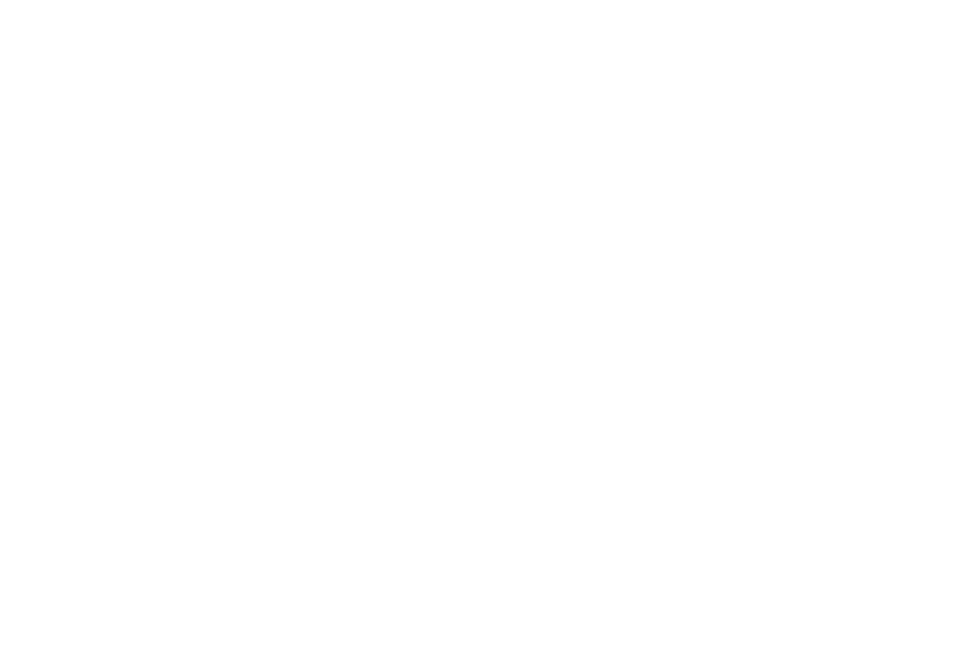

<IPython.core.display.Javascript object>


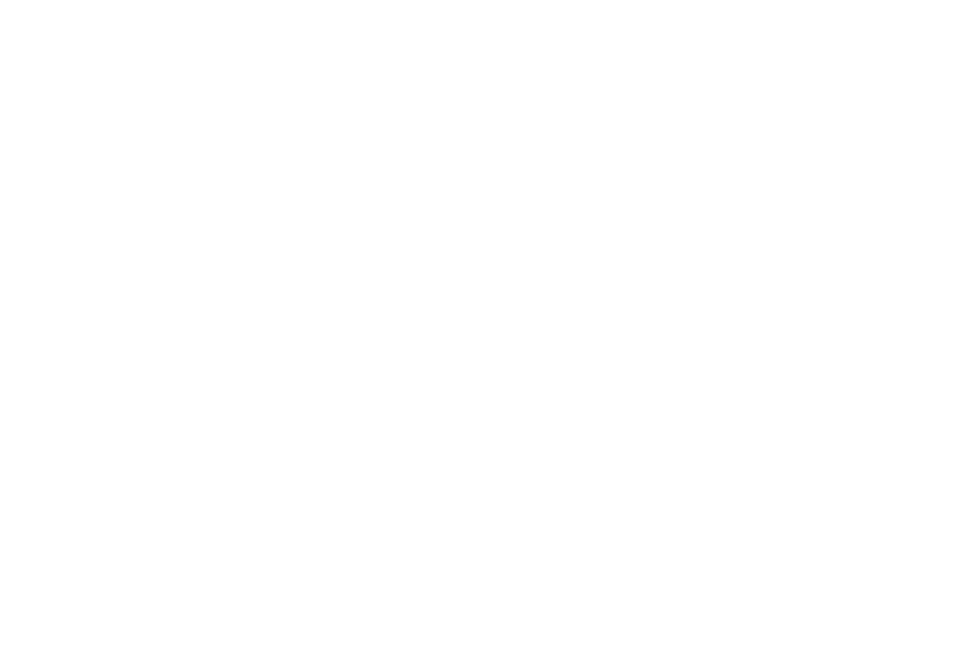

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import unicode_literals
from bidi.algorithm import get_display
import arabic_reshaper
%matplotlib notebook
#%matplotlib inline
# reshape the farsi characters to desplay them correctly

reshape = lambda x :get_display( arabic_reshaper.reshape( str(x)))

name = list(zip(*top_ten))[0]
repetation = list(zip(*top_ten))[1]

# convert tuple to list
name = list(name)

for  i,n in enumerate(name):
    name[i]=reshape(n)

x_pos = np.arange(len(name)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, repetation, 1)
trendline = intercept + (slope * x_pos)

plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, repetation,align='center')
plt.xticks(x_pos, name) 
plt.ylabel(reshape("most common words"))
plt.rcParams["figure.figsize"] = (8,8)
plt.show()
plt.savefig("mostused")

In [53]:
# uncomment if gensim is installed
#!pip install gensim
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [54]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
data=dfn

In [55]:
data

,title,content
0,خرید گوگل ذرهبین کمیسیون فدرال ارتباطات مریکا,گزارش فارس نقل وال استریت گوگل هفته پرداخت دلا...
1,بازار سکه دلار تحلیلگران پایان فصل عروسی هندیه...,گزارش خبرنگار اقتصادی خبرگزاری فارس ابتدای هفت...
2,افشای ابعاد جاسوسی فیس بوک کاربرانش,گزارش فارس نقل زد دی نت عاملی خشم کاربران دامن...
3,بازگشایی توقف حراج نمادهای بورسی,گزارش خبرگزاری فارس نقل بورس اوراق بهادار تهرا...
4,غرب پیروزی انتخاباتی روحانی,گزارش سرویس فضای مجازی خبرگزاری فارس سعدالله ز...
5,دلار هدیه امیران عرب شاهزاده چارلز همسرش,گزارش سرویس فضای مجازی خبرگزاری فارس روزنامه ج...
6,اتفاقات حوزه محیط زیست تبعات جهانی,گزارش خبرگزاری فارس دشتستان اصغر مطهری شب گذشت...
7,افزایش دانش حقوقی تلاش,توکل حیدری خبرنگار فارس ارومیه فرا رسیدن هفته ...
8,امام عج عدالت اسلامی جهان مستقر,گزارش خبرگزاری فارس بوشهر حجت الاسلام سیدنورال...
9,ریس ستاد برگزاری پنجمین جشنواره اختراعات خلیج ...,گزارش خبرگزاری فارس بوشهر نقل روابط عمومی بنیا...


In [56]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['title', 'content']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)


,title,content
0,خرید گوگل ذرهبین کمیسیون فدرال ارتباطات مریکا,گزارش فارس نقل وال استریت گوگل هفته پرداخت دلا...
1,بازار سکه دلار تحلیلگران پایان فصل عروسی هندیه...,گزارش خبرنگار اقتصادی خبرگزاری فارس ابتدای هفت...
2,افشای ابعاد جاسوسی فیس بوک کاربرانش,گزارش فارس نقل زد دی نت عاملی خشم کاربران دامن...
3,بازگشایی توقف حراج نمادهای بورسی,گزارش خبرگزاری فارس نقل بورس اوراق بهادار تهرا...
4,غرب پیروزی انتخاباتی روحانی,گزارش سرویس فضای مجازی خبرگزاری فارس سعدالله ز...


In [57]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['title', 'content']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]


[['خرید', 'گوگل', 'ذرهبین', 'کمیسیون', 'فدرال', 'ارتباطات', 'مریکا'],
 ['بازار',
  'سکه',
  'دلار',
  'تحلیلگران',
  'پایان',
  'فصل',
  'عروسی',
  'هندیها',
  'کاهش',
  'تقاضای',
  'جهانی',
  'طلا']]

In [58]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)


2018-11-03 19:53:34,554 : INFO : collecting all words and their counts
2018-11-03 19:53:34,558 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-11-03 19:53:34,642 : INFO : collected 25382 word types from a corpus of 252608 raw words and 2012 sentences
2018-11-03 19:53:34,645 : INFO : Loading a fresh vocabulary
2018-11-03 19:53:34,664 : INFO : effective_min_count=200 retains 164 unique words (0% of original 25382, drops 25218)
2018-11-03 19:53:34,666 : INFO : effective_min_count=200 leaves 60355 word corpus (23% of original 252608, drops 192253)
2018-11-03 19:53:34,669 : INFO : deleting the raw counts dictionary of 25382 items
2018-11-03 19:53:34,673 : INFO : sample=0.001 downsamples 164 most-common words
2018-11-03 19:53:34,675 : INFO : downsampling leaves estimated 33585 word corpus (55.6% of prior 60355)
2018-11-03 19:53:34,679 : INFO : estimated required memory for 164 words and 100 dimensions: 213200 bytes
2018-11-03 19:53:34,682 : INFO : resetting la

In [59]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=1000, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


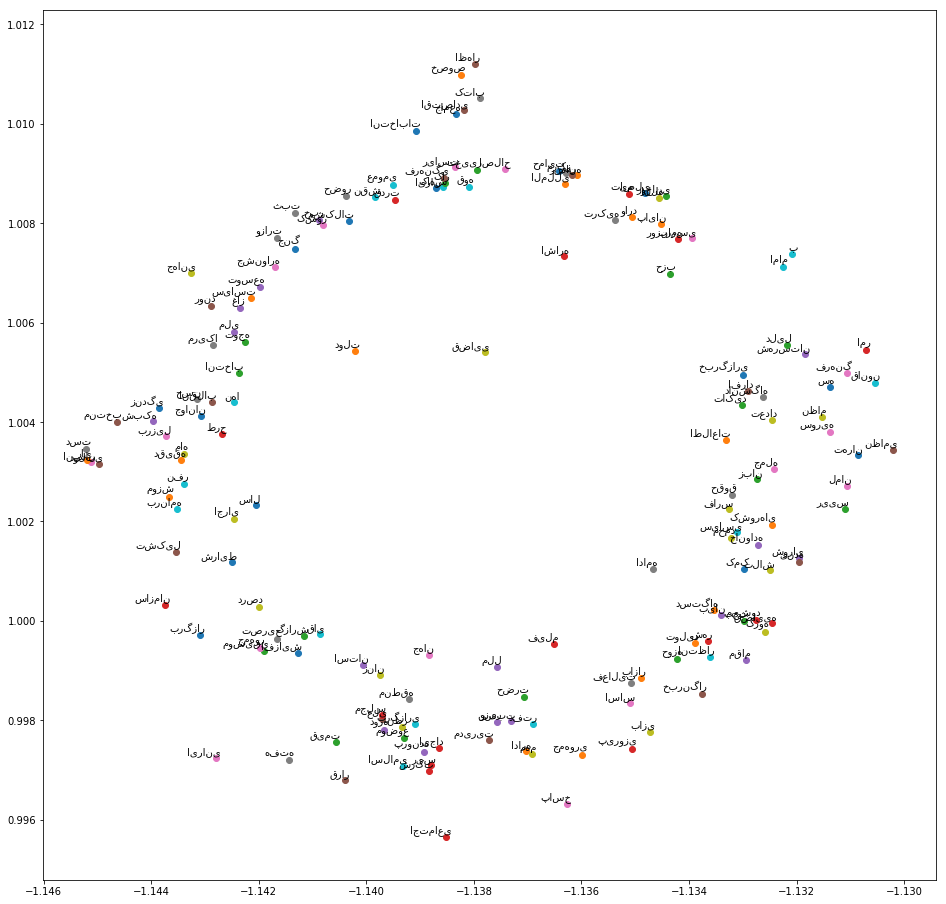

In [60]:
tsne_plot(model)

2018-11-03 19:53:39,672 : INFO : collecting all words and their counts
2018-11-03 19:53:39,674 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-11-03 19:53:39,746 : INFO : collected 25382 word types from a corpus of 252608 raw words and 2012 sentences
2018-11-03 19:53:39,749 : INFO : Loading a fresh vocabulary
2018-11-03 19:53:39,767 : INFO : effective_min_count=500 retains 24 unique words (0% of original 25382, drops 25358)
2018-11-03 19:53:39,769 : INFO : effective_min_count=500 leaves 19016 word corpus (7% of original 252608, drops 233592)
2018-11-03 19:53:39,772 : INFO : deleting the raw counts dictionary of 25382 items
2018-11-03 19:53:39,777 : INFO : sample=0.001 downsamples 24 most-common words
2018-11-03 19:53:39,780 : INFO : downsampling leaves estimated 3349 word corpus (17.6% of prior 19016)
2018-11-03 19:53:39,783 : INFO : estimated required memory for 24 words and 100 dimensions: 31200 bytes
2018-11-03 19:53:39,787 : INFO : resetting layer we

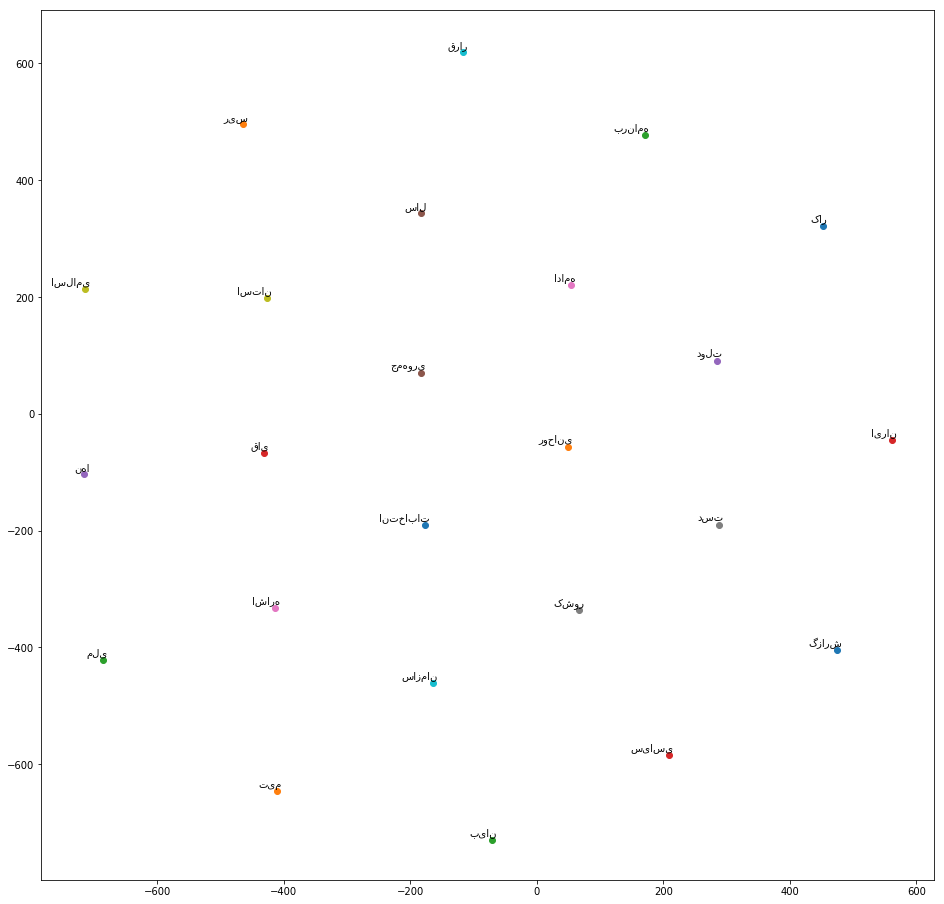

In [61]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

2018-11-03 19:53:41,146 : INFO : collecting all words and their counts
2018-11-03 19:53:41,150 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-11-03 19:53:41,217 : INFO : collected 25382 word types from a corpus of 252608 raw words and 2012 sentences
2018-11-03 19:53:41,219 : INFO : Loading a fresh vocabulary
2018-11-03 19:53:41,244 : INFO : effective_min_count=100 retains 448 unique words (1% of original 25382, drops 24934)
2018-11-03 19:53:41,246 : INFO : effective_min_count=100 leaves 100523 word corpus (39% of original 252608, drops 152085)
2018-11-03 19:53:41,250 : INFO : deleting the raw counts dictionary of 25382 items
2018-11-03 19:53:41,253 : INFO : sample=0.001 downsamples 96 most-common words
2018-11-03 19:53:41,255 : INFO : downsampling leaves estimated 85670 word corpus (85.2% of prior 100523)
2018-11-03 19:53:41,259 : INFO : estimated required memory for 448 words and 100 dimensions: 582400 bytes
2018-11-03 19:53:41,260 : INFO : resetting l

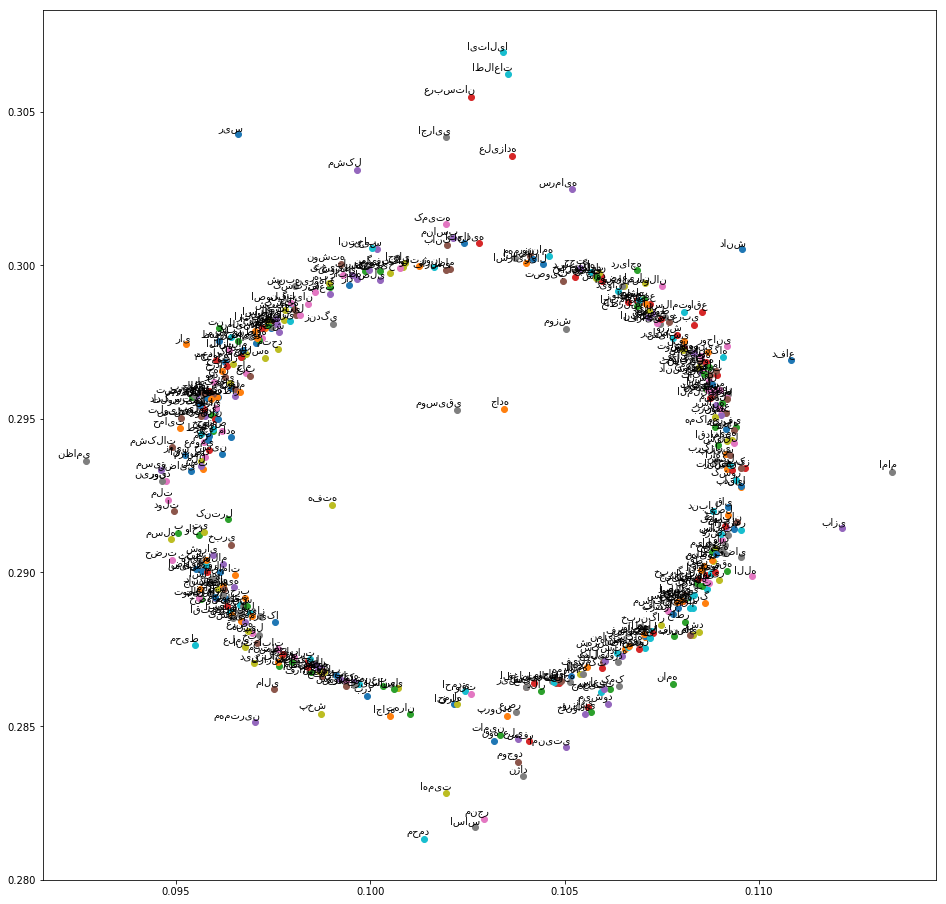

In [62]:


# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

